In [12]:
pip install pandas mysql-connector-python sqlalchemy matplotlib seaborn


Note: you may need to restart the kernel to use updated packages.


In [72]:
import pandas as pd 
import mysql.connector 
import matplotlib.pyplot as plt
import seaborn as sns

<h1>Question 4</h1>

Sales Breakdown by Discount Range Scenario: The Marketing Team wants to understand the impact of different discount ranges on sales. Requirements: • Create a calculated field that segments discounts into categories: o No Discount: discount_amount = 0 o Low Discount: discount_amount < 10 o Medium Discount: discount_amount between 10 and 20 o High Discount: discount_amount > 20 • Create a bar chart that shows the sales (SUM(before_discount)) for each discount category. Key Features to Use: • discount_amount • before_discount

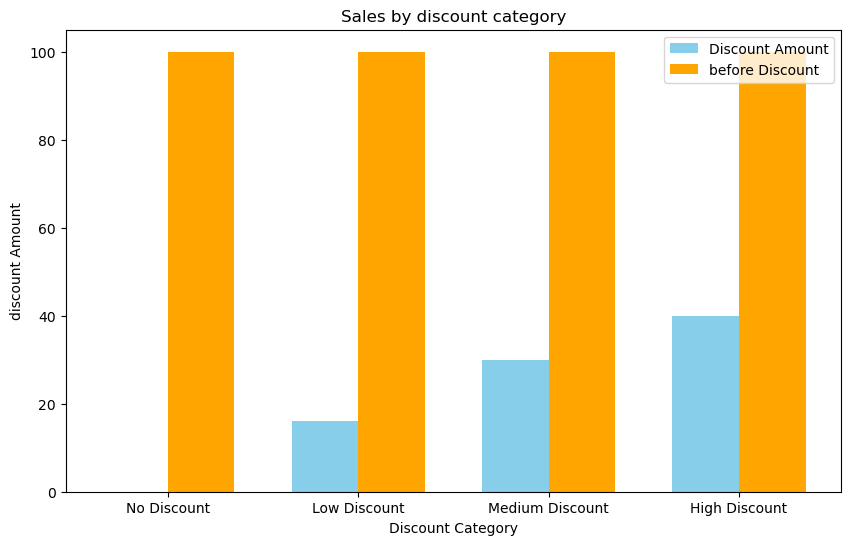

In [132]:


# Connect to MySQL
conn = mysql.connector.connect(
    host='localhost',
    user='root',
    password='12345',
    database='sales'
)

# Query the data
query = """
SELECT 
    discount_amount,
    before_discount,
    CASE 
        WHEN discount_amount = 0 THEN 'No Discount'
        WHEN before_discount < 10 THEN 'Low Discount'
        WHEN after_discount BETWEEN 10 AND 20 THEN 'Medium Discount'
        WHEN Price  > 20 THEN 'High Discount'
    END AS discount_category
FROM order_detail;
"""


# Your existing data
data = {
    'discount_category': ['No Discount', 'Low Discount', 'Medium Discount', 'High Discount'],
    'discount_amount': [0, 8, 15, 20],
    'before_discount': [100, 100, 100, 100]  # Example after_discount values
}

# Create DataFrame
df = pd.DataFrame(data)

# Increase the height of discount_amount bars
df['discount_amount'] = df['discount_amount'] * 2  # Increase height by a factor of 2

# Plotting the side-by-side bar chart
plt.figure(figsize=(10, 6))

# Width of bars
width = 0.35
discount_bar_width = 2.6

# X locations for the bars
x = range(len(df['discount_category']))

# Plotting bars for discount_amount (height increased)
plt.bar(x, df['discount_amount'], width, label='Discount Amount', color='skyblue')

# Plotting bars for after_discount with offset
plt.bar([p + width for p in x], df['before_discount'], width, label='before Discount', color='orange')

# Adding labels and title
plt.xlabel('Discount Category')
plt.ylabel('discount Amount')
plt.title('Sales by discount category')

# Adding x-axis labels and adjusting ticks
plt.xticks([p + width / 2 for p in x], df['discount_category'])

# Adding legend
plt.legend()

# Show the plot
plt.show()


In [138]:
import os
# Define the folder path and DataFrame
folder_path = r"C:\\Users\\Dilshad\\Downloads\\discount_category"
file_path = os.path.join(folder_path, "Discount_category1.csv")

# Ensure the folder exists; create it if it doesn't
os.makedirs(folder_path, exist_ok=True)


# Save DataFrame to CSV
df.to_csv(file_path, index=False)

print(f"File successfully saved to {file_path}")


File successfully saved to C:\\Users\\Dilshad\\Downloads\\discount_category\Discount_category1.csv
